In [1]:
#pip install tensorflow_hub

In [2]:
# loading liabraries
import numpy as np
import cv2
import glob

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# We have to use image size of 224,224 as Google Net was created in such a way that input size is 224,224

In [3]:
# Image_shape+(3) is given to add channel in the image, since its a color image so its 3 channel
IMAGE_SHAPE = (224, 224)
classifier=tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,)
)])

## Make predictions using ready made model (without any training)

**Note we have done-- input_shape=IMAGE_SHAPE+(3,)**

**To make it 3 channeled we have done this, also why (3,)**


In [4]:
# Why we have given (3,) instead of (3) as (3) is int
type(3)

int

In [5]:
type((3,))

tuple

**since we are using tuple(224,224) so we use (3,)**

# In case of Google colab

In [6]:
# # Imports
# from google.colab import drive
# from PIL import Image

# # Mount Google Drive for fast, responsible access to files
# drive.mount('/content/gdrive')
# # Open image
# img = Image.open('/content/gdrive/MyDrive/Colab Notebooks/goldy.png')
# img

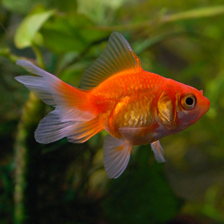

In [7]:
gold_fish = Image.open("goldy.png").resize(IMAGE_SHAPE)
gold_fish

### Resizing the image

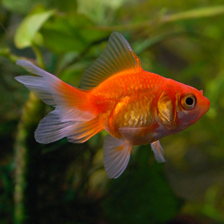

In [8]:
# Now we have to resize the image accoring to image shape i.e (224,224)
gold_fish=gold_fish.resize(IMAGE_SHAPE)
gold_fish

## Since we have aalready trained model, which could classify 1000 images which is stored in ImageNet Labels below, Also goldfish is one of them which the model will predict

#### Lets test whether it predict goldfish or not

## Normalize the data

In [9]:
 # normalize the image in order to do classification
gold_fish=np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

### Since prediction acccept multiple image as input we cant supply only one image as the input, so we add one more dimension to our goldfish image

In [10]:
gold_fish[np.newaxis].shape

(1, 224, 224, 3)

**We get 1000 probablilities as the model is trained to give classification output out of 1000 probabilities**

In [11]:
result=classifier.predict(gold_fish[np.newaxis])
result

array([[ 0.22101441,  2.0474904 ,  9.622561  , ..., -1.4621575 ,
        -0.28146738, -0.25984576]], dtype=float32)

In [12]:
result.shape

(1, 1001)

In [13]:
pred_label=np.argmax(result)
pred_label

2

**Content of 1000 classification, goldfishis at index 2**

**Reading the all 1000 classification, which google net model has classified**

In [14]:
img_labels=[]
with open("ImageNetLabels.txt","r") as f:
    img_labels=f.read().splitlines()
img_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [15]:
# if we supply the index to the list of all classification we get the predicted image
img_labels[pred_label]

'goldfish'

### We see the goldfish was correctly predicted

# Transfer learning
**Now we use this model to classify the dataset of flowers**
* Load flower dataset

In [16]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [17]:
data_dir

'.\\datasets\\flower_photos'

**Converting string path into windows path**

In [18]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

**Converting string path into windows path**
* so that we can perform functions like this--

In [19]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

**if we have window path and we do `(*/*.jpg)` , it will go recursively into all the directories and get the file path of individual image**

In [20]:
# counting the image
cnt=len(list(data_dir.glob('*/*.jpg')))
cnt

3670

## Getting the roses images

In [21]:
# fetching roses records from the data_dir folder
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

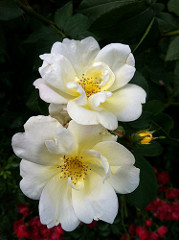

In [22]:
Image.open(roses[0])

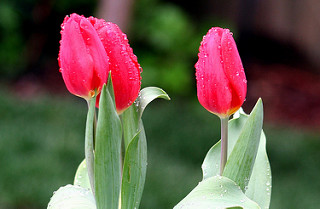

In [23]:
## opening tulip image
# fetching roses records from the data_dir folder
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]
Image.open(tulips[0])

#### creating a dictionary of flowers

In [24]:

flower_images_dict={"roses":list(data_dir.glob('roses/*')),
                       "tulips":list(data_dir.glob('tulips/*')),
                   "daisy":list(data_dir.glob('daisy/*')),
                   "dandelion":list(data_dir.glob('dandelion/*')),
                   "sunflowers":list(data_dir.glob('sunflowers/*'))}
flower_images_dict["roses"]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

#### Creating label directory as well coz ML model wont undesrtand text

In [25]:

flower_label_dict={"roses":0,
                       "tulips":1,
                   "daisy":2,
                   "dandelion":3,
                   "sunflowers":4}
flower_label_dict

{'roses': 0, 'tulips': 1, 'daisy': 2, 'dandelion': 3, 'sunflowers': 4}

### window path

In [26]:

str(flower_images_dict["roses"][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

### Reading the image via cv2

In [27]:
img=cv2.imread(str(flower_images_dict["roses"][0]))
img.shape

(240, 179, 3)

## Resizing the image as image are of diff shape

In [28]:
for flower_name,images in flower_images_dict.items():
    for img in images:
        print(img)

datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg
datasets\flower_photos\roses\102501987_3cdb8e5394_n.jpg
datasets\flower_photos\roses\10503217854_e66a804309.jpg
datasets\flower_photos\roses\10894627425_ec76bbc757_n.jpg
datasets\flower_photos\roses\110472418_87b6a3aa98_m.jpg
datasets\flower_photos\roses\11102341464_508d558dfc_n.jpg
datasets\flower_photos\roses\11233672494_d8bf0a3dbf_n.jpg
datasets\flower_photos\roses\11694025703_9a906fedc1_n.jpg
datasets\flower_photos\roses\118974357_0faa23cce9_n.jpg
datasets\flower_photos\roses\11944957684_2cc806276e.jpg
datasets\flower_photos\roses\12045735155_42547ce4e9_n.jpg
datasets\flower_photos\roses\12165480946_c4a3fe182d_n.jpg
datasets\flower_photos\roses\12202373204_34fb07205b.jpg
datasets\flower_photos\roses\12238827553_cf427bfd51_n.jpg
datasets\flower_photos\roses\12240165555_98625b1e88_n.jpg
datasets\flower_photos\roses\12240303_80d87f77a3_n.jpg
datasets\flower_photos\roses\12240577184_b0de0e53ea_n.jpg
datasets\flower_photos\roses\

In [29]:
x=[]
y=[]
for flower_name,images in flower_images_dict.items():
    for imgage in images:
        img=cv2.imread(str(imgage))
        resize_img=cv2.resize(img,IMAGE_SHAPE)
        x.append(resize_img)
        y.append(flower_label_dict[flower_name])
        

In [30]:
x[0].shape

(224, 224, 3)

In [31]:
type(x)

list

In [32]:
# since x and y are list we convert them into array
x=np.array(x)
y=np.array(y)

### Train test split


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

## Normalize the data

In [34]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

# Lets use our google net model on the flower daatset

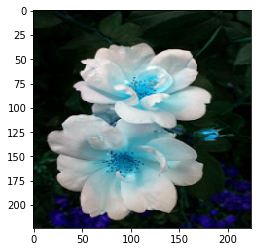

In [35]:
plt.imshow(x[0])

In [36]:
predicted = classifier.predict(np.array([x[0]]))
predicted

array([[ 0.2271876,  0.3929838,  1.473065 , ..., -1.250794 , -1.9604896,
         3.8786166]], dtype=float32)

In [37]:
np.argmax(predicted)

795

In [39]:
img_labels[(np.argmax(predicted))]

'shower curtain'

# Conclusion
* Google ne has predicted it as shower curtain, as the model is  trained on 1000 classifying object may shower cutain has some picture of flowers on it, so we need to tweak in the googlne model to classsigy flowers correctly

# Downloading the model with only feature vector i.e only inital layers are present in this except the last few layes

In [43]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


# trainable=False will freeze the layers of the model, didnt train the layers of the model these layers now have fix weights

# Creating a customize model with only last layer which is intoduced

In [44]:
num_of_flowers=5
model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


## Complie the model

In [46]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.fit(x_train_scaled,y_train,epochs=3)

Epoch 1/3
86/86 [==============================] - 175s 2s/step - loss: 0.7749 - accuracy: 0.7137
Epoch 2/3
86/86 [==============================] - 168s 2s/step - loss: 0.4103 - accuracy: 0.8612
Epoch 3/3
86/86 [==============================] - 177s 2s/step - loss: 0.3193 - accuracy: 0.8968


**from_logits=True**
* attribute inform the loss function that the output values generated by the model are not normalized, a.k.a. logits. In other words, the softmax function has not been applied on them to produce a probability distribution. Therefore, the output layer in this case does not have a softmax activation function:

**from_logits=False (default)**
*  The softmax function would be automatically applied on the output values by the loss function.Therefore, this does not make a difference with the scenario when you use `from_logits=False` (default) and a softmax activation function on last layer; however, in some cases, this might help with numerical stability during training of the model. 

In [48]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 58s 2s/step - loss: 0.4013 - accuracy: 0.8573


[0.4013485908508301, 0.8572984933853149]

# Prediction


In [66]:
x_test_scaled[0].shape

(224, 224, 3)

In [92]:

value=np.argmax(model.predict(np.array([x_test_scaled[1]])))
value

2

In [94]:
val=value
for i in flower_label_dict.items():
    if i[1]==val:
        print(i)

('daisy', 2)


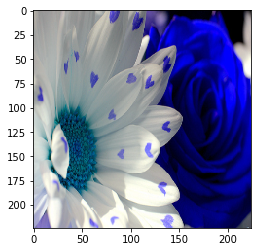

In [91]:
plt.imshow(x_test_scaled[1])